In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing # For forecasting [cite: 217]

In [2]:
df = pd.read_csv('ecommerce_dataset_updated.csv')

# Crucial: Convert to datetime and set it as the index [cite: 212]
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], dayfirst=True)
df.set_index('Purchase_Date', inplace=True)

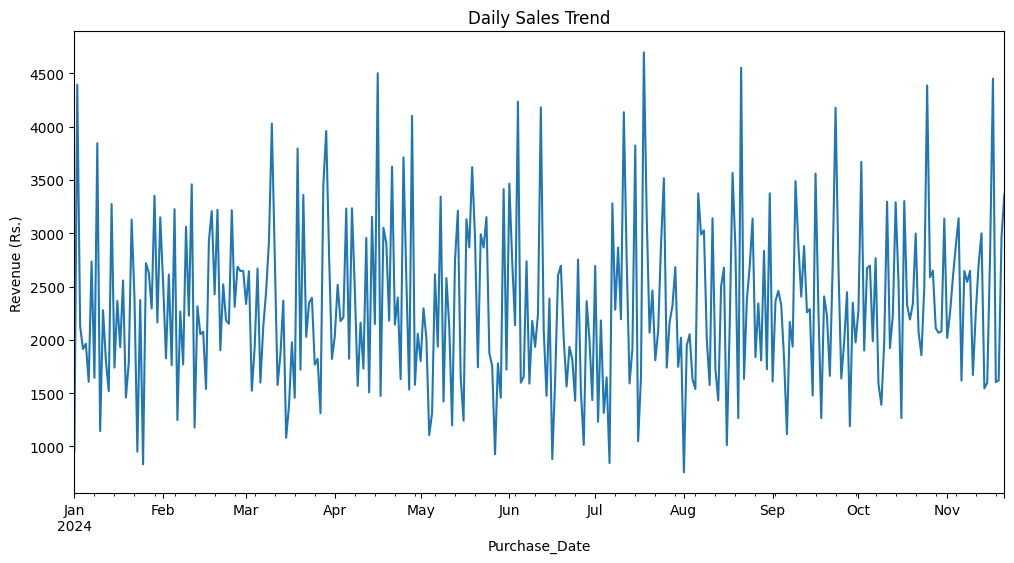

In [3]:
# Group sales by Day to see the daily revenue trend
daily_sales = df['Final_Price(Rs.)'].resample('D').sum().fillna(0)

# Plot the trend to see if sales are going up or down [cite: 214]
plt.figure(figsize=(12, 6))
daily_sales.plot(title='Daily Sales Trend')
plt.ylabel('Revenue (Rs.)')
plt.show()

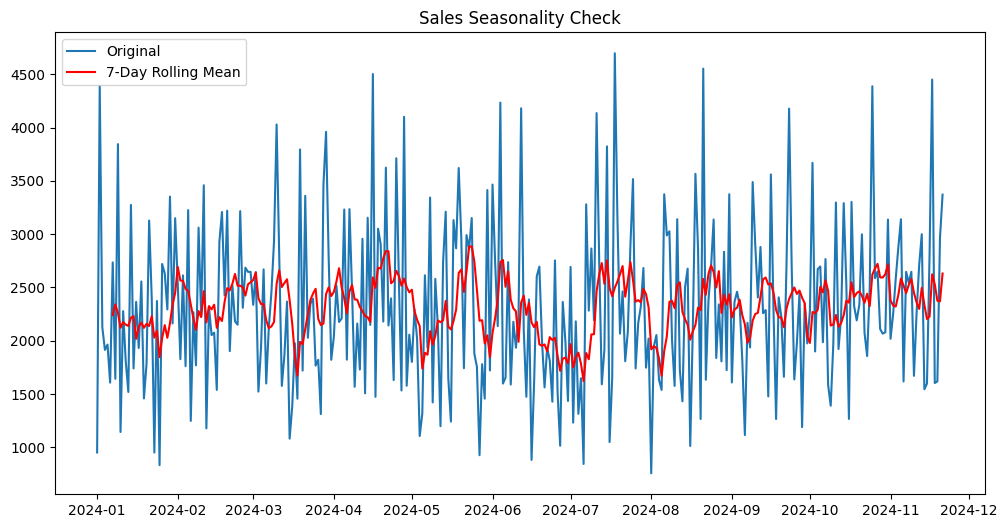

In [4]:
# 7-day rolling mean to see weekly patterns
rolling_mean = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Original')
plt.plot(rolling_mean, color='red', label='7-Day Rolling Mean')
plt.legend()
plt.title('Sales Seasonality Check')
plt.show()

In [5]:
# Fit the model [cite: 217]
model = ExponentialSmoothing(daily_sales, trend='add', seasonal=None).fit()

# Predict the next 7 days [cite: 218]
forecast = model.forecast(7)

print("Forecasted Sales for Next 7 Days:")
print(forecast)

Forecasted Sales for Next 7 Days:
2024-11-22    2382.221145
2024-11-23    2382.583744
2024-11-24    2382.946344
2024-11-25    2383.308943
2024-11-26    2383.671543
2024-11-27    2384.034143
2024-11-28    2384.396742
Freq: D, dtype: float64


In [6]:
# Fit the forecasting model
model = ExponentialSmoothing(daily_sales, trend='add', seasonal=None).fit()

# Predict the next 7 days
forecast_values = model.forecast(7)

# Check the results in Colab
print(forecast_values)

2024-11-22    2382.221145
2024-11-23    2382.583744
2024-11-24    2382.946344
2024-11-25    2383.308943
2024-11-26    2383.671543
2024-11-27    2384.034143
2024-11-28    2384.396742
Freq: D, dtype: float64


In [7]:
# Convert the forecast numbers into a Dataframe (table)
forecast_df = pd.DataFrame(forecast_values, columns=['Forecasted_Sales'])
forecast_df.index.name = 'Forecast_Date'

# Save it to a CSV file named exactly as required
forecast_df.to_csv('forecast_output.csv')

print("File 'forecast_output.csv' has been created successfully!")

File 'forecast_output.csv' has been created successfully!
